In [1]:
import pandas as pd
df=pd.read_csv('healthcare_dataset.csv')
df


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [2]:
df.shape


(55500, 15)

In [3]:
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Import Libraries


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [12]:

data = pd.read_csv('healthcare_dataset.csv') 


In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Scaling features
scaler = StandardScaler()
data.columns = data.columns.str.strip()


scaled_features = scaler.fit_transform(data.drop("Test_Results", axis=1))  # Correct axis value
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data["Test_Results"]

# Continue with splitting the data and model training


# split the data


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model

In [17]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluate the Model

In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'weighted' or 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.43513513513513513
Precision: 0.4352051854790974
Recall: 0.435023424067952
F1 Score: 0.43481181802252067
Confusion Matrix:
 [[1738 1010 1006]
 [1111 1556  950]
 [1150 1043 1536]]


In [20]:
# Display feature importance (useful for Random Forest)
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


               Feature  Importance
6               Doctor    0.101035
0                 Name    0.101003
7             Hospital    0.100815
9       Billing Amount    0.100487
12      Discharge Date    0.099752
5    Date of Admission    0.099077
10         Room Number    0.096493
1                  Age    0.083771
3           Blood Type    0.050593
4    Medical Condition    0.043925
8   Insurance Provider    0.040155
13          Medication    0.039972
11      Admission Type    0.027200
2               Gender    0.015722


# Visualization 


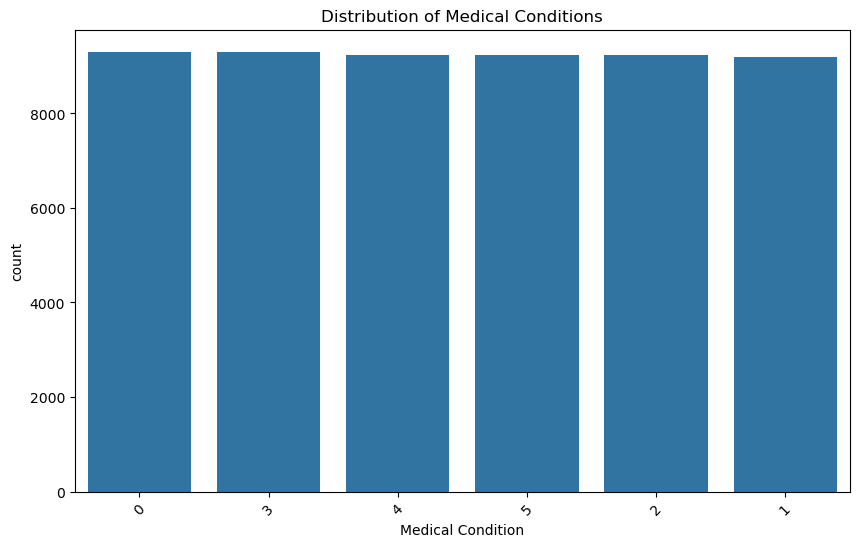

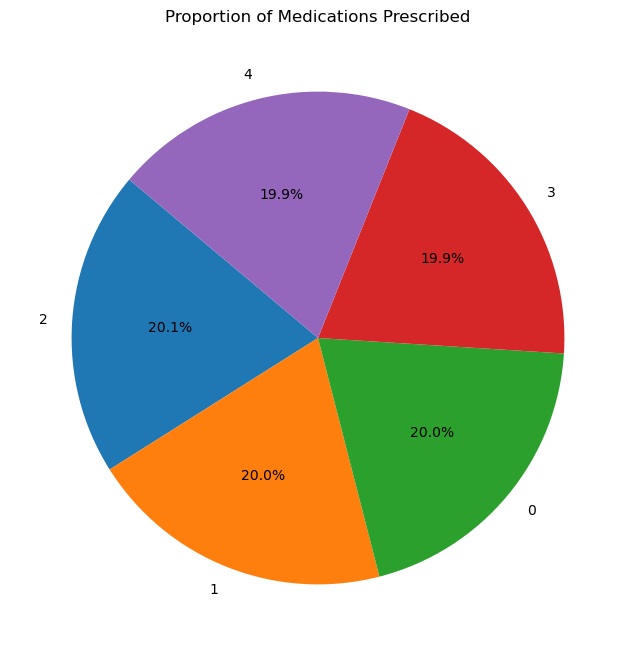

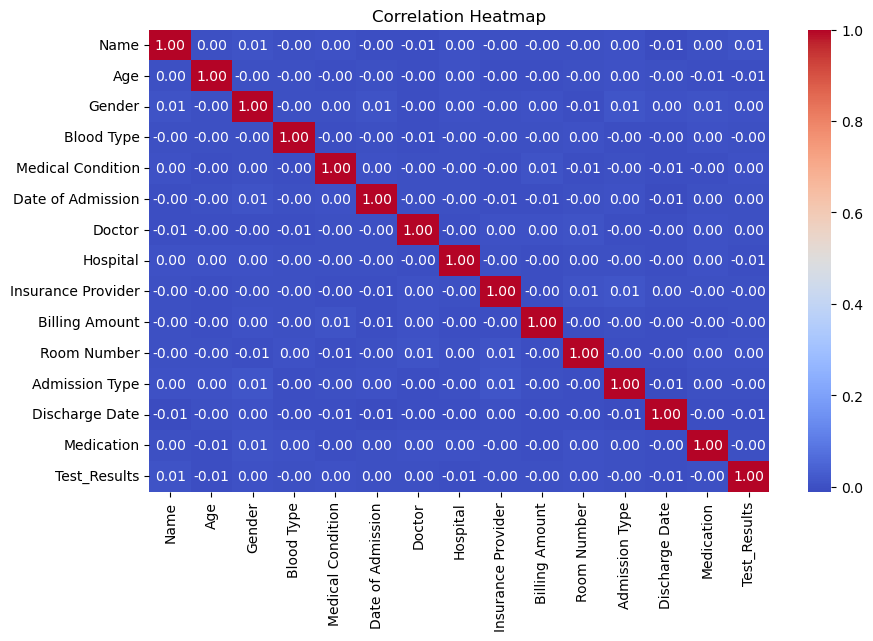

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Medical Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Medical Condition', order=data['Medical Condition'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Medical Conditions")
plt.show()

# Proportion of Medications
medication_counts = data['Medication'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(medication_counts, labels=medication_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Medications Prescribed")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [26]:
# Prepare features and target for prediction
X = data.drop(columns=['Medication', 'Name', 'Date of Admission', 'Doctor', 'Hospital', 
                       'Insurance Provider', 'Discharge Date'])
y = data['Medication']

# Encode the target column (Medication)
medication_encoder = LabelEncoder()
y = medication_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=[str(cls) for cls in medication_encoder.classes_])

print(report)


              precision    recall  f1-score   support

           0       0.31      0.33      0.32      2211
           1       0.33      0.33      0.33      2271
           2       0.31      0.31      0.31      2224
           3       0.34      0.32      0.33      2207
           4       0.31      0.30      0.30      2187

    accuracy                           0.32     11100
   macro avg       0.32      0.32      0.32     11100
weighted avg       0.32      0.32      0.32     11100

